# **HW2: Kinematics of Robot**

คำชี้แจง
1. ให้เขียนโค้ดเพื่อตอบโจทย์ในแต่ละข้อในไฟล์นี้ และแสดงวิธีทำข้อที่ 1 (ต้องมี) และข้ออื่น ๆ (ถ้ามี) ลงบนกระดาษทด (1 กระดาษทด/คู่)
2. ส่งงานเป็นไฟล์ ZIP โดยตั้งชื่อ FRA333_HW2_65xx_65xx.zip โดยมีไฟล์นี้ชื่อ HW2_notebook.ipynb และไฟล์กระดาษทดที่ตั้งชื่อ 65xx_65xx.pdf อยู่ข้างใน

In [1]:
import roboticstoolbox as rtb
import numpy as np

from spatialmath import SE3
from math import pi
import matplotlib.pyplot as plt
import numpy as np
from time import sleep

## 1. Modified DH-Parameters

กำหนดให้แขนกลซึ่งเป็น Serial Manipulator มี Home Configuration ดังภาพ โดยมีเฟรม {0} เป็น Base Frame ที่ใช้อ้างอิงในการทำระบบควบคุมต่าง ๆ และเฟรม {e} เป็นเฟรมของ End-effector (ให้ Link $L_2$ ตั้งฉากกับพื้นโลก)

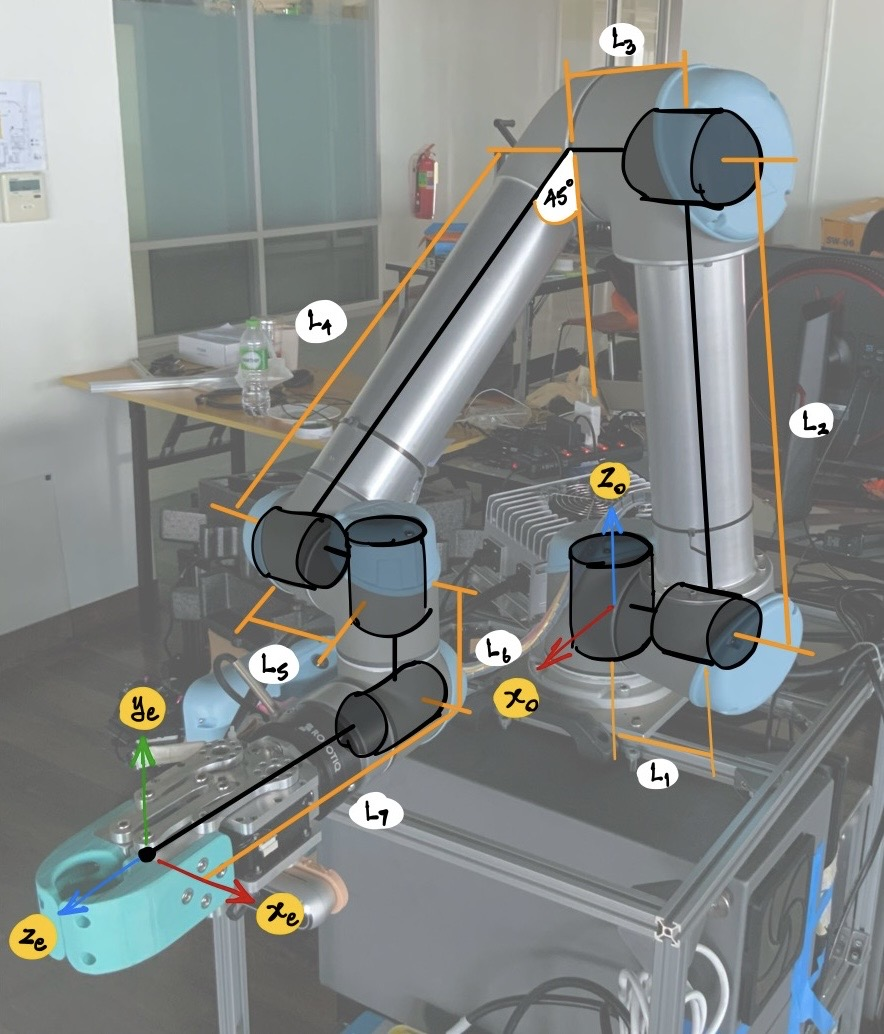

##### 1.1. จงหา MDH-Parameter ของแขนกล หากกำหนดให้ $L_1=200 mm$, $L_2=700 mm$, $L_3=200 mm$, $L_4=700 mm$, $L_5=200 mm$, $L_6=300 mm$, และ $L_7=500 mm$ ระบุวิธีทำและวิธีการตั้งแกนมาในกระดาษทด

In [2]:
# Define the robot using DH parameters(with SI unit)
robot = rtb.DHRobot(
    [
        rtb.RevoluteMDH(),  
        rtb.RevoluteMDH(alpha=-pi/2 ,d=0.2 , offset=-pi/2),  
        rtb.RevoluteMDH(a=0.7 ,d=-0.2 ,offset= 3*pi/4),  
        rtb.RevoluteMDH(a=0.7 ,d=0.2 ,offset= -pi/4),
        rtb.RevoluteMDH(alpha=pi/2 ,d=-0.3 ,offset= pi/2),
        rtb.RevoluteMDH(alpha=pi/2),
    ],
    tool = SE3(0,0,0.5),
    name = "6DOF_Robot"
)

print(robot)

DHRobot: 6DOF_Robot, 6 joints (RRRRRR), dynamics, modified DH parameters
┌──────┬────────┬────────────┬──────┐
│ aⱼ₋₁ │  ⍺ⱼ₋₁  │     θⱼ     │  dⱼ  │
├──────┼────────┼────────────┼──────┤
│  0.0 │   0.0° │         q1 │  0.0 │
│  0.0 │ -90.0° │   q2 - 90° │  0.2 │
│  0.7 │   0.0° │  q3 + 135° │ -0.2 │
│  0.7 │   0.0° │   q4 - 45° │  0.2 │
│  0.0 │  90.0° │   q5 + 90° │ -0.3 │
│  0.0 │  90.0° │         q6 │  0.0 │
└──────┴────────┴────────────┴──────┘

┌──────┬─────────────────────────────────────┐
│ tool │ t = 0, 0, 0.5; rpy/xyz = 0°, 0°, 0° │
└──────┴─────────────────────────────────────┘



##### 1.2. จงแสดงให้เห็นว่า MDH-Parameter ที่ระบุมาในข้อ 1.1 สามารถแสดง Kinematic ของหุ่นยนต์ได้

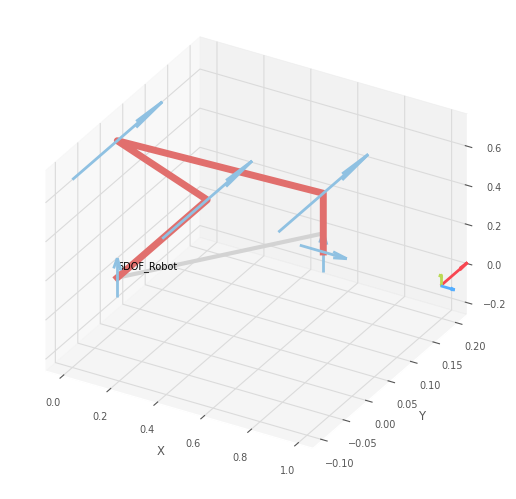

   0         0         1         0.995     
   1         0         0         0.2       
   0         1         0        -0.09497   
   0         0         0         1         



<Figure size 640x480 with 0 Axes>

In [3]:
q = [0, 0, 0, 0, 0, 0]
T_0e = robot.fkine(q)

robot.plot(q)

print(T_0e)

## 2. Forward Kinematics

##### 2.1. จงหา POSE ของเฟรม {e} เมื่อกำหนดให้ [$q_1$, $q_2$, $q_3$, $q_4$, $q_5$, $q_6$] เท่ากับ 45, 30, 60, 30, 90, และ 270 องศา ตามลำดับ

In [4]:
qe = [pi/4, pi/6, pi/3, pi/6, pi/2, -pi/2] #แทนค่า270องศาเป็น -90 องศา

P_0e = robot.fkine(qe)
print(np.deg2rad(qe))
print(qe)
print(P_0e)


[ 0.01370778  0.00913852  0.01827705  0.00913852  0.02741557 -0.02741557]
[0.7853981633974483, 0.5235987755982988, 1.0471975511965976, 0.5235987755982988, 1.5707963267948966, -1.5707963267948966]
  -0.6124    0.3536   -0.7071   -0.7812    
  -0.6124    0.3536    0.7071    0.2088    
   0.5       0.866     0         0.2612    
   0         0         0         1         



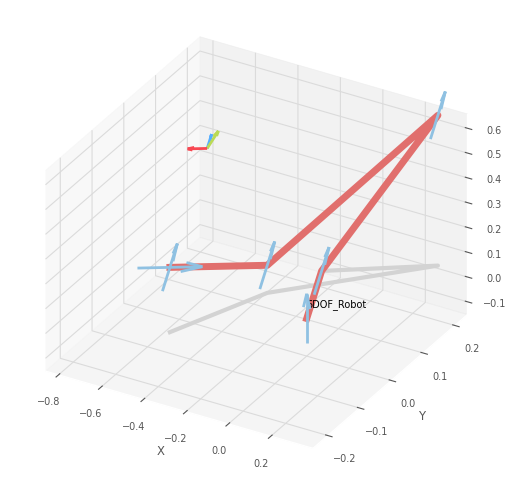

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, '6DOF_Robot')

<Figure size 640x480 with 0 Axes>

In [5]:
robot.plot(qe)

##### 2.2. จงแสดงให้เห็นว่าคำตอบข้อที่ตอบมาในข้อที่ 2.1. เป็นคำตอบที่ถูกต้อง

In [6]:
def Modify_XZ(tx,rx,tz,rz):
    return SE3.Rx(rx) * SE3(tx,0,0) * SE3.Rz(rz) * SE3(0,0,tz)

In [7]:
pose = SE3()
set_a = [0, 0, 0.7, 0.7, 0, 0]
set_alpha = [0, -pi/2, 0, 0, pi/2, pi/2]
set_d = [0, 0.2, -0.2, 0.2, -0.3, 0]
set_offset = [0, -pi/2, 3*pi/4, -pi/4, pi/2, 0]

for i in range(len(robot.links)):
    pose = pose * Modify_XZ(set_a[i] ,set_alpha[i] ,set_d[i] ,qe[i] + set_offset[i])
pose = pose * robot.tool
print(pose)

  -0.6124    0.3536   -0.7071   -0.7812    
  -0.6124    0.3536    0.7071    0.2088    
   0.5       0.866     0         0.2612    
   0         0         0         1         



In [8]:
q_solution = robot.ik_GN(P_0e)
q_solution2 = robot.ik_LM(P_0e)
q_solution3 = robot.ik_NR(P_0e)
print(q_solution[0])
print(q_solution2[0])
print(q_solution3[0])

#[0.7853981633974483, 0.5235987755982988, 1.0471975511965976, 0.5235987755982988, 1.5707963267948966, -1.5707963267948966]
#[0.01370778 0.00913852 0.01827705 0.00913852 0.02741557 0.0822467 ]

[ 0.78539469 -0.34347927  1.77731518  2.71571636  1.57079392  2.65723177]
[ 0.78548054 -2.70560035  0.50774541 -1.76414303  1.5708523  -1.79758006]
[ 0.78539612 -1.92470026  0.46058594 -3.03204831  1.57079488 -1.26342862]


In [199]:
target = np.array([0.7853981633974483, 0.5235987755982988, 1.0471975511965976, 0.5235987755982988, 1.5707963267948966, -1.5707963267948966])

# Initialize a loop counter and error tolerance
max_iterations = 1000
tolerance = 0.001  # Allow small error margin
iteration = 0

# Initialize variables to store the closest solution and its error
best_solution = None
best_error = float('inf')

# Loop until the solution matches the target within the tolerance
while iteration < max_iterations:
    # Get the IK solutions from different methods
    q_solution = robot.ik_GN(P_0e)
    q_solution2 = robot.ik_LM(P_0e)
    q_solution3 = robot.ik_NR(P_0e)
    
    # Extract the solutions in radians
    q_rad_solution = q_solution[0]
    q_rad_solution2 = q_solution2[0]
    q_rad_solution3 = q_solution3[0]
    
    # Calculate the error for each solution
    error1 = np.linalg.norm(q_rad_solution - target)
    error2 = np.linalg.norm(q_rad_solution2 - target)
    error3 = np.linalg.norm(q_rad_solution3 - target)

    # Check if any of the solutions is close enough to the target
    if error1 < tolerance:
        print(f"Solution found using GN after {iteration} iterations.")
        print(q_rad_solution)
        break
    elif error2 < tolerance:
        print(f"Solution found using LM after {iteration} iterations.")
        print(q_rad_solution2)
        break
    elif error3 < tolerance:
        print(f"Solution found using NR after {iteration} iterations.")
        print(q_rad_solution3)
        break
    
    # Update the best solution if the current one is closer
    if error1 < best_error:
        best_error = error1
        best_solution = q_rad_solution
    if error2 < best_error:
        best_error = error2
        best_solution = q_rad_solution2
    if error3 < best_error:
        best_error = error3
        best_solution = q_rad_solution3

    iteration += 1

# If no exact match was found, print the closest solution
if iteration == max_iterations:
    print("Solution not found within the maximum number of iterations.")
    print(f"Closest solution found with error {best_error}:")
    print(best_solution)


Solution not found within the maximum number of iterations.
Closest solution found with error 0.00765323117615887:
[ 0.78513285  0.52803099  1.04695099  0.51763684  1.57064851 -1.56899917]


## 3. Inverse Kinematics

##### 3.1. หากต้องการควบคุมให้ End-effector ไปอยู่ที่ตำแหน่ง x = 511 mm, y = 684 mm, z = 926 mm โดยมี roll = 30°, pitch = 45°, yaw = 60° (Fixed Axis X-Y-Z) จะมีวิธีการที่สามารถหมุนข้อต่อให้ End-effector อยู่ในท่าทางดังกล่าวได้กี่วิธี เพราะอะไร

In [13]:
# Define the target pose in terms of position and orientation (roll, pitch, yaw)
target_pose = SE3(0.511, 0.684, 0.926) * SE3.RPY([pi/6, pi/4, pi/3])

# Create a list to store all unique solutions
solutions = []

# Try multiple initial guesses to capture different solutions
for initial_guess in [np.zeros(6), np.pi * np.ones(6), -np.pi * np.ones(6), np.random.rand(6)*2*np.pi - np.pi]:
    sol = robot.ikine_LM(target_pose, q0=initial_guess)  # Solve using Levenberg-Marquardt optimization
    
    if sol.success:  # Check if solution found
        joint_solution = np.rad2deg(sol.q)
        
        # Store only unique solutions
        if not any(np.allclose(joint_solution, s) for s in solutions):
            solutions.append(joint_solution)

# Print out all unique joint solutions
print("Possible Joint Solutions in Degrees:\n", np.array(solutions))

Possible Joint Solutions in Degrees:
 [[  54.57532581  -29.17639357  -34.83820227   21.0237032   -26.09551008
   -85.73120646]
 [ -83.72443938   38.94358577  109.91001385  -76.75845179  130.05630764
  -130.55007635]
 [ -83.72443964  -10.63718068  132.39153935  130.340787     49.94369452
    49.44992593]]


##### 3.2. การจะควบคุมให้ End-effector อยู่ในท่าทางดังกล่าวต้องหมุนแต่ละข้อต่ออย่างไรบ้าง 

In [14]:
T_desired = SE3([0.511, 0.684, 0.926]) * SE3.RPY([pi/6, pi/4, pi/3])
print(T_desired)

sols = []

for i in range(50):
    q, success, _, _, _ = robot.ik_LM(T_desired)  
    if not any(np.allclose(q, s, atol=1) for s in sols):
        sols.append(q)

print(sols)

   0.3536   -0.5732    0.7392    0.511     
   0.6124    0.7392    0.2803    0.684     
  -0.7071    0.3536    0.6124    0.926     
   0         0         0         1         

[array([ 0.95251868,  0.13481014, -0.48790582,  2.7443558 , -2.68614032,
        1.64530117]), array([ 0.95249738,  1.23893282,  2.17881975,  2.11510415, -0.45542561,
       -1.49628101]), array([ 0.95251751, -0.50923965, -0.60802462,  0.36692369, -0.45545661,
       -1.49631301]), array([-1.46126792,  0.67969271,  1.91829127, -1.33968911,  2.26991034,
       -2.27852571]), array([ 0.95224674,  2.0036546 ,  2.05734987, -1.66960956, -2.68616066,
        1.64533739]), array([-1.46115059, -1.80192173, -0.73980197,  0.65873731,  0.87184097,
        0.86276047]), array([-1.46108761, -0.18553402,  2.31068895,  2.27552702,  0.87189896,
        0.86222413])]


##### 3.3. จงแสดงให้เห็นว่าการหมุนข้อต่อที่ตอบมาในข้อ 3.2. เป็นคำตอบที่ถูกต้อง

In [15]:
for i,sol in enumerate(sols):
    print(f"Solution {i+1}")
    fk = robot.fkine(sol)
    print(fk)

Solution 1
   0.3536   -0.5732    0.7392    0.511     
   0.6124    0.7392    0.2803    0.684     
  -0.7071    0.3536    0.6124    0.926     
   0         0         0         1         

Solution 2
   0.3536   -0.5732    0.7392    0.511     
   0.6124    0.7392    0.2803    0.684     
  -0.7071    0.3535    0.6124    0.926     
   0         0         0         1         

Solution 3
   0.3536   -0.5732    0.7392    0.511     
   0.6124    0.7392    0.2803    0.684     
  -0.7071    0.3535    0.6124    0.926     
   0         0         0         1         

Solution 4
   0.3536   -0.5732    0.7392    0.511     
   0.6124    0.7392    0.2803    0.684     
  -0.7071    0.3536    0.6124    0.926     
   0         0         0         1         

Solution 5
   0.3536   -0.573     0.7393    0.5108    
   0.6122    0.7394    0.2802    0.6833    
  -0.7072    0.3535    0.6123    0.9257    
   0         0         0         1         

Solution 6
   0.3536   -0.5731    0.7393    0.511     
   0.

## 4. Workspace

##### 4.1. จงแสดงให้เห็น Workspace ของหุ่นยนต์

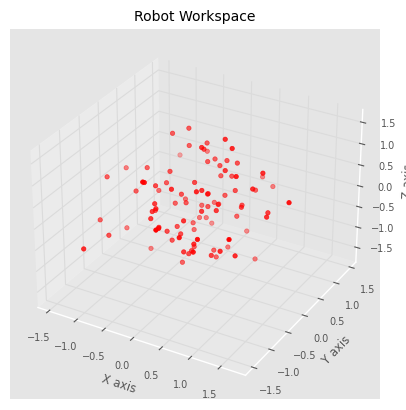

In [292]:
# กำหนดขอบเขตของการเคลื่อนไหวของข้อต่อแต่ละตัว
num_samples = 100
q_limits = np.array([[-np.pi, np.pi]] * 6)

# สุ่มตัวอย่างของมุมข้อต่อ
q_samples = np.random.uniform(q_limits[:, 0], q_limits[:, 1], size=(num_samples, 6))

# เก็บตำแหน่งปลายแขนของหุ่นยนต์
workspace_points = []

for q in q_samples:
    T = robot.fkine(q)  # คำนวณตำแหน่งจาก forward kinematics
    workspace_points.append(T.t)  # เก็บตำแหน่งในรูปแบบ 3D

workspace_points = np.array(workspace_points)

# แสดง workspace ในรูปแบบ 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(workspace_points[:, 0], workspace_points[:, 1], workspace_points[:, 2], s=10, c='r', marker='o')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title("Robot Workspace")

plt.show()

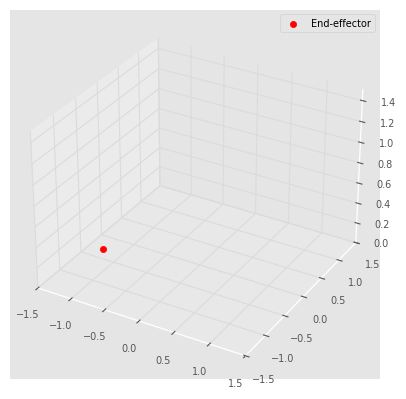

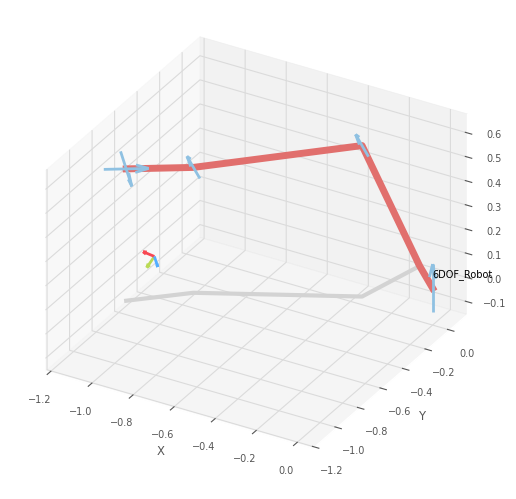

<Figure size 640x480 with 0 Axes>

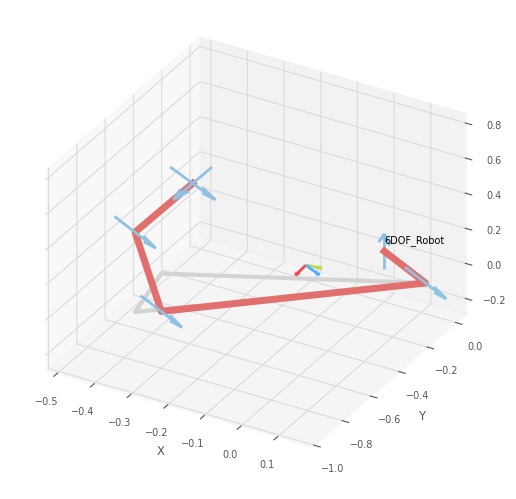

<Figure size 640x480 with 0 Axes>

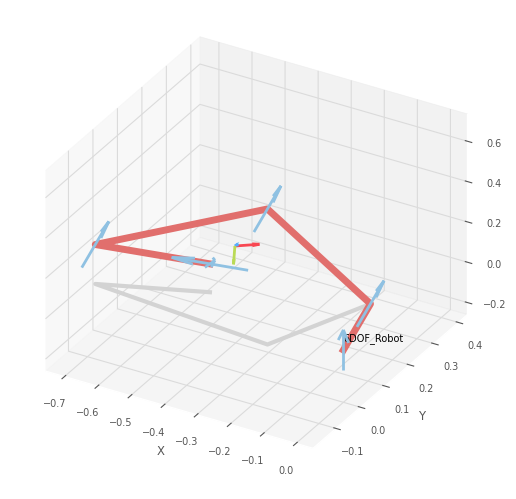

<Figure size 640x480 with 0 Axes>

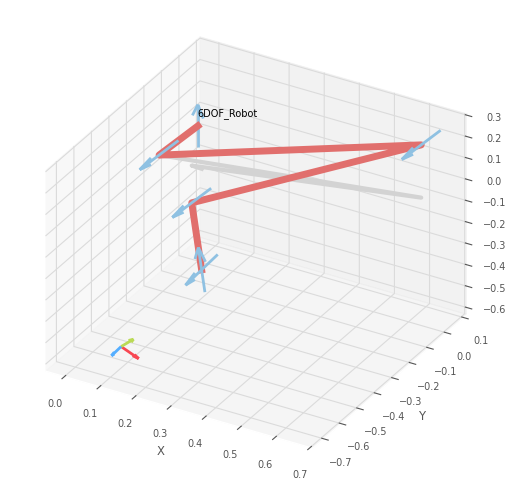

<Figure size 640x480 with 0 Axes>

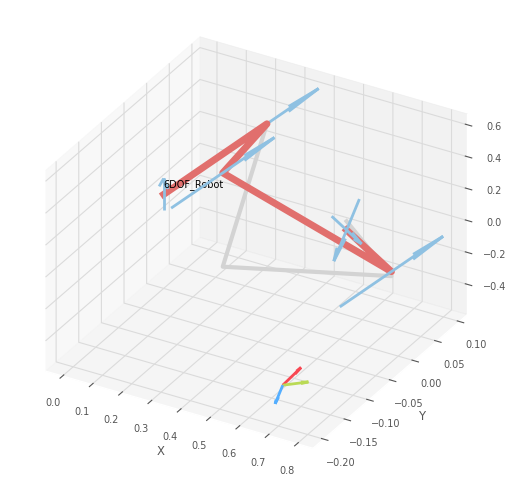

<Figure size 640x480 with 0 Axes>

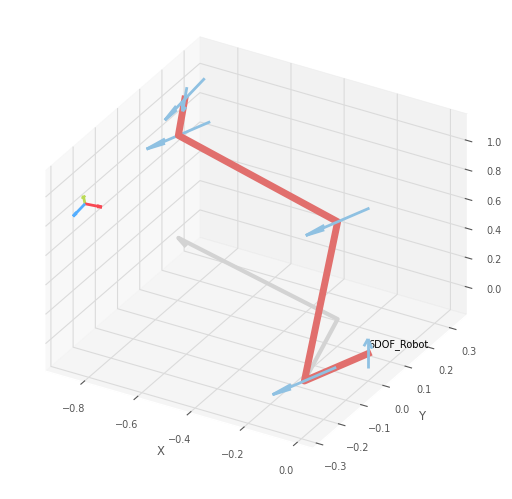

<Figure size 640x480 with 0 Axes>

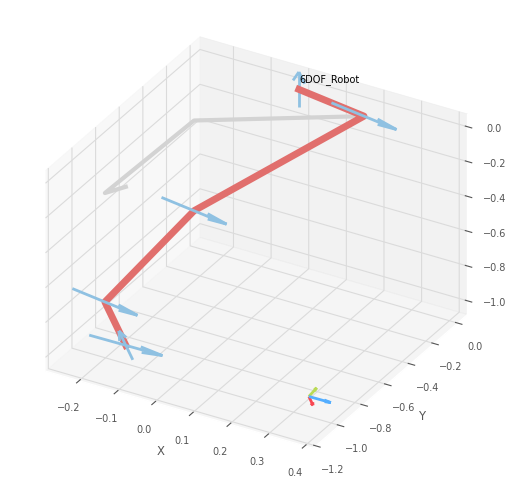

<Figure size 640x480 with 0 Axes>

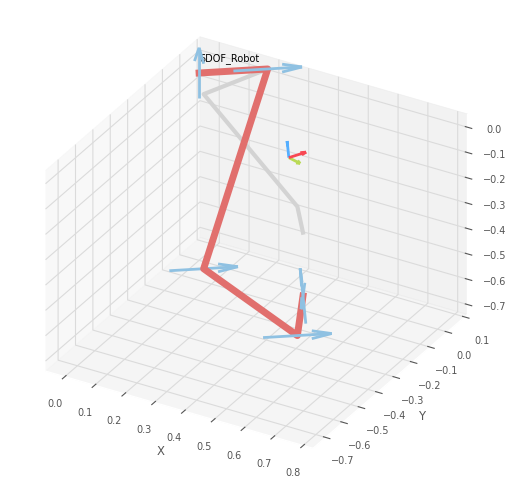

<Figure size 640x480 with 0 Axes>

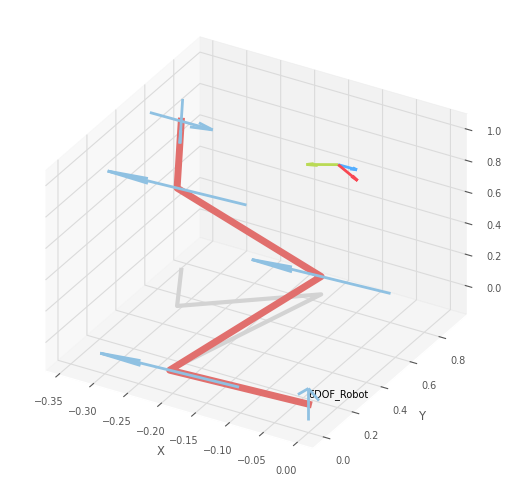

<Figure size 640x480 with 0 Axes>

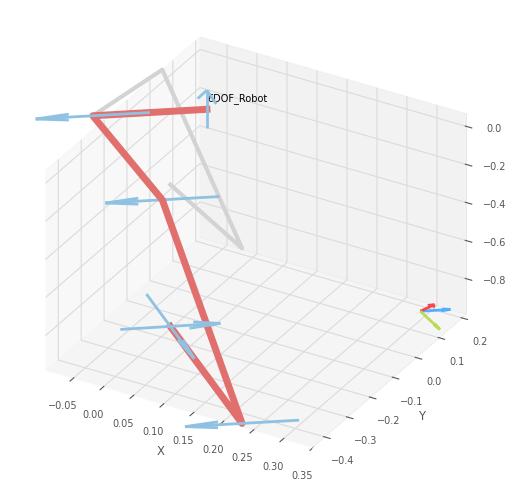

<Figure size 640x480 with 0 Axes>

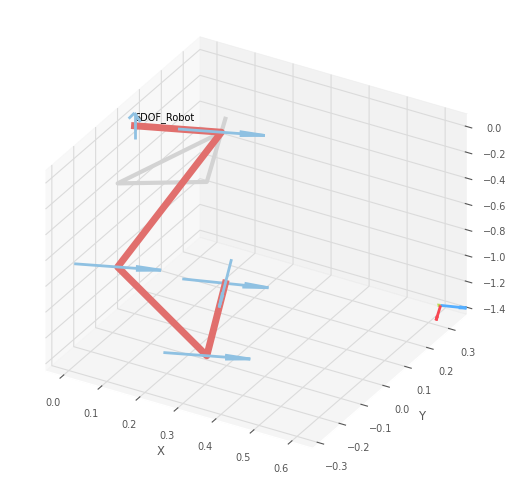

<Figure size 640x480 with 0 Axes>

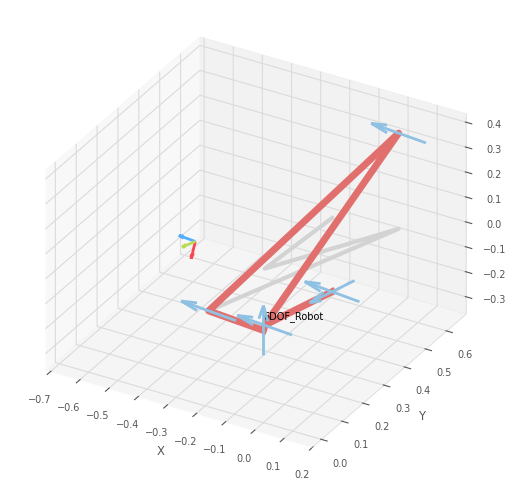

<Figure size 640x480 with 0 Axes>

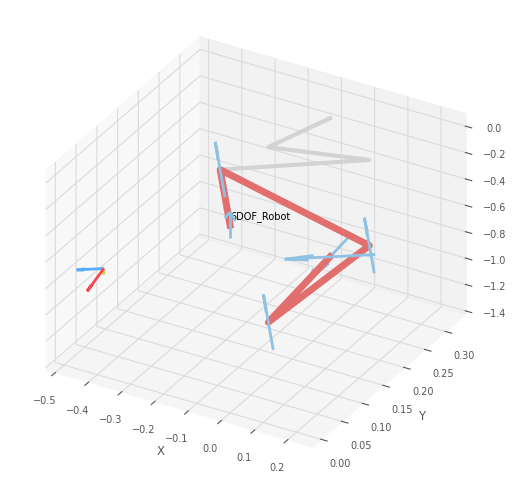

<Figure size 640x480 with 0 Axes>

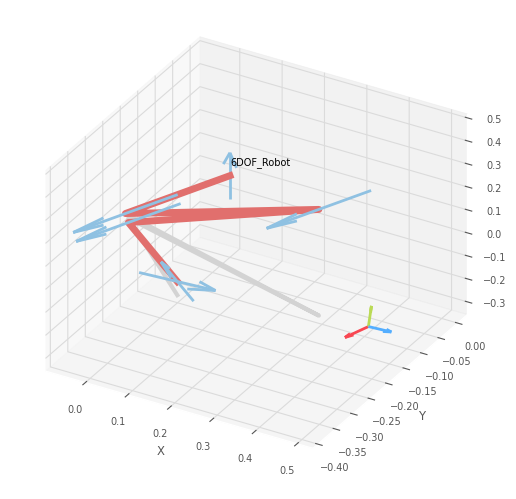

<Figure size 640x480 with 0 Axes>

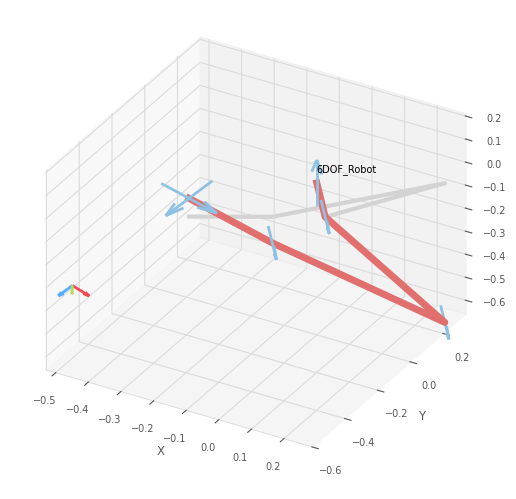

<Figure size 640x480 with 0 Axes>

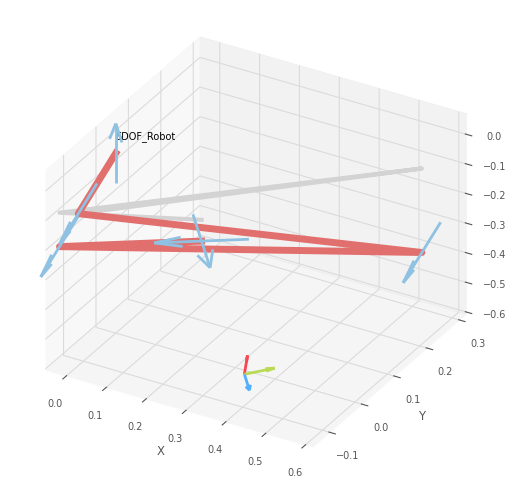

<Figure size 640x480 with 0 Axes>

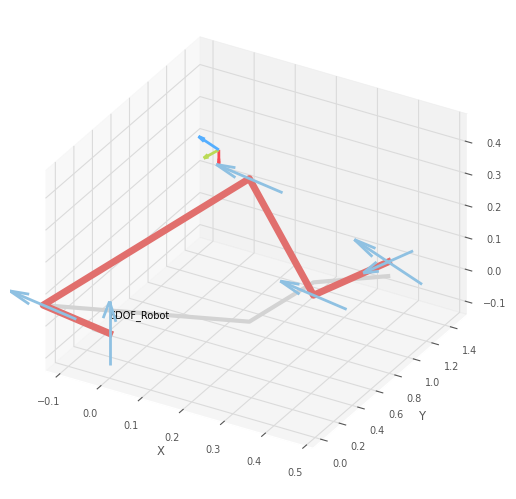

<Figure size 640x480 with 0 Axes>

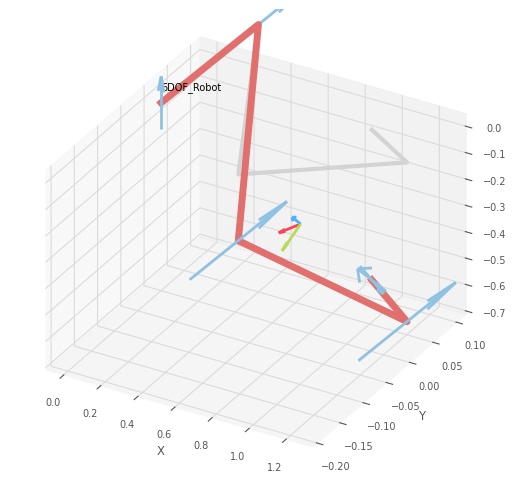

<Figure size 640x480 with 0 Axes>

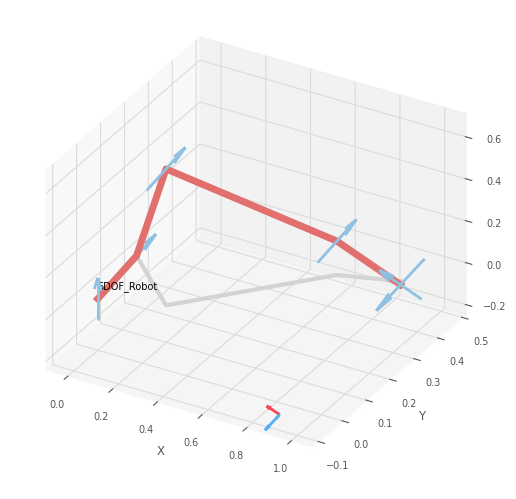

<Figure size 640x480 with 0 Axes>

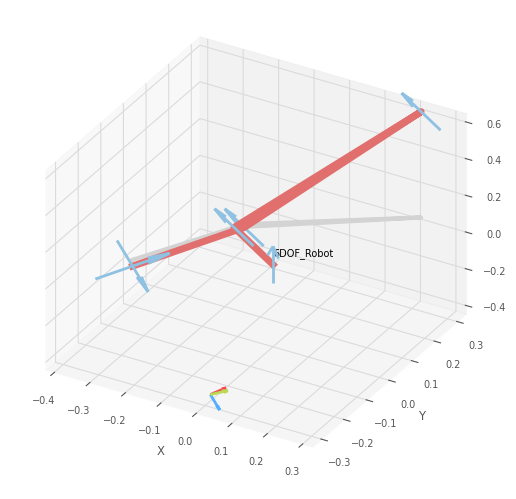

<Figure size 640x480 with 0 Axes>

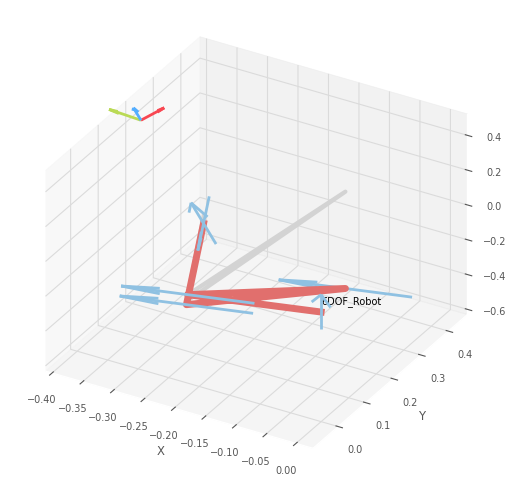

<Figure size 640x480 with 0 Axes>

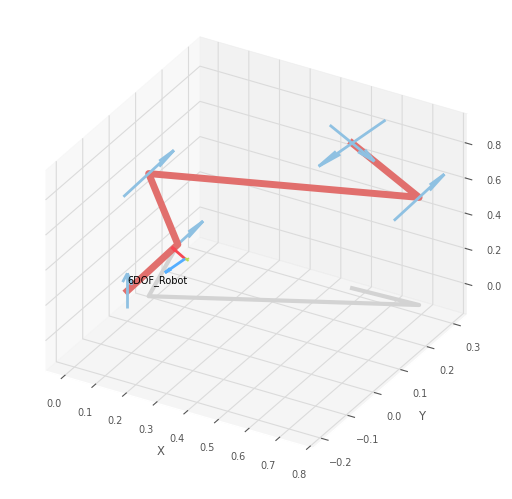

<Figure size 640x480 with 0 Axes>

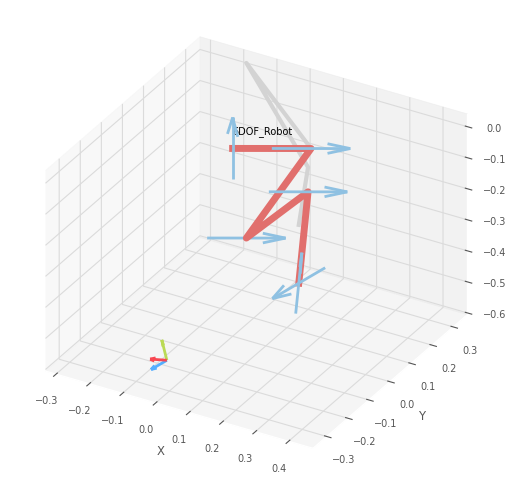

<Figure size 640x480 with 0 Axes>

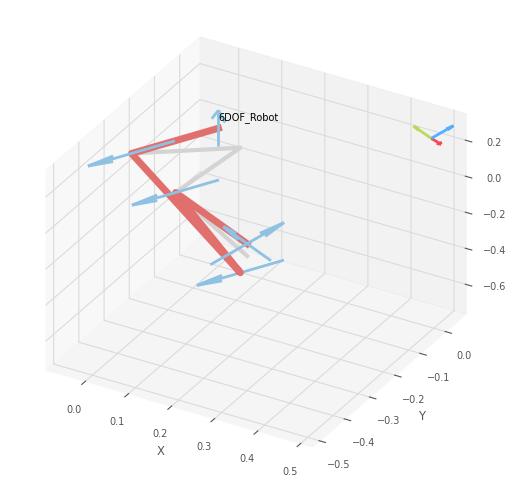

<Figure size 640x480 with 0 Axes>

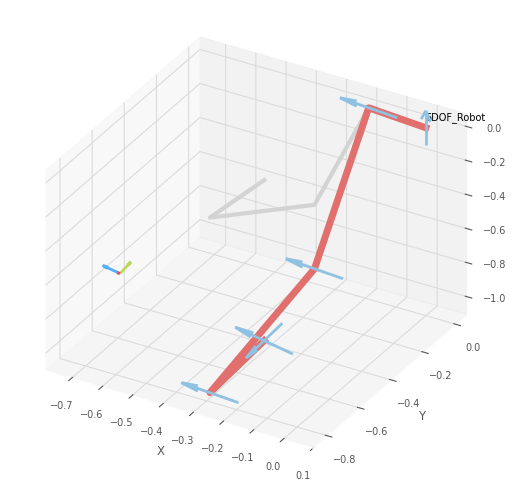

<Figure size 640x480 with 0 Axes>

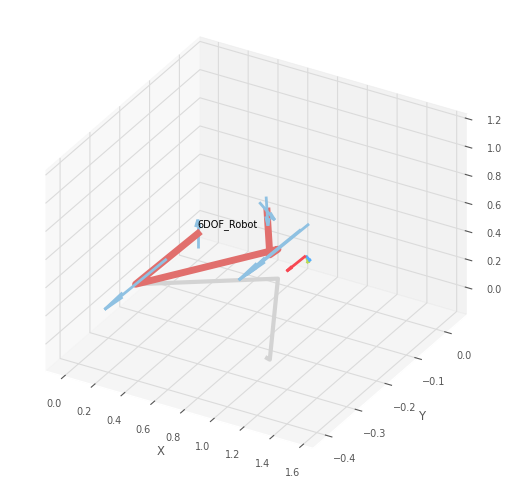

<Figure size 640x480 with 0 Axes>

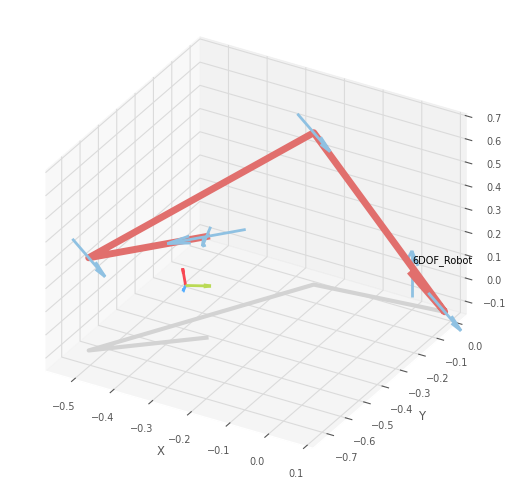

<Figure size 640x480 with 0 Axes>

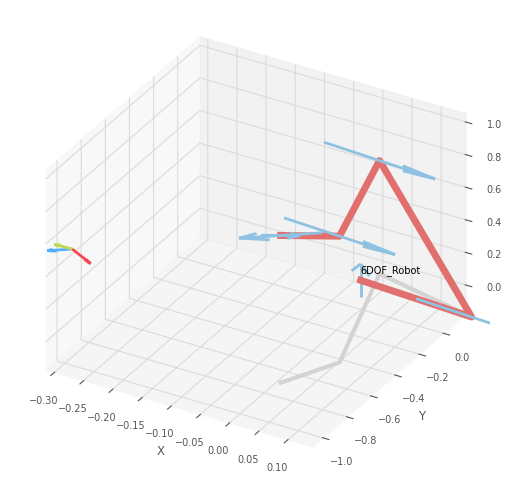

<Figure size 640x480 with 0 Axes>

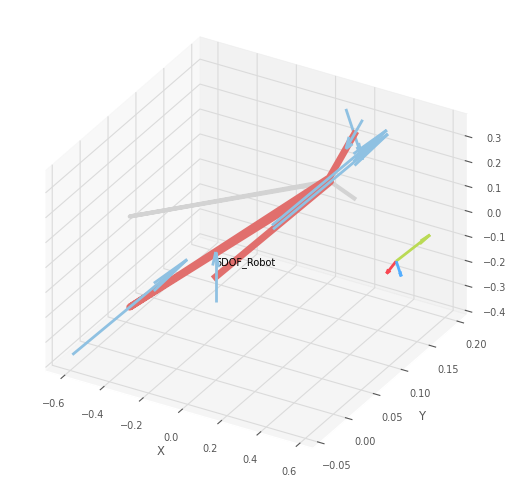

<Figure size 640x480 with 0 Axes>

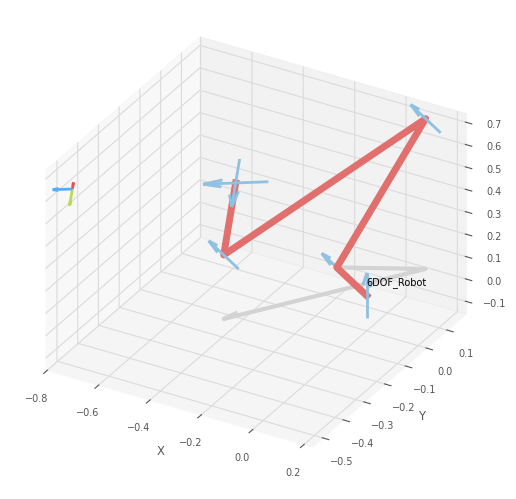

<Figure size 640x480 with 0 Axes>

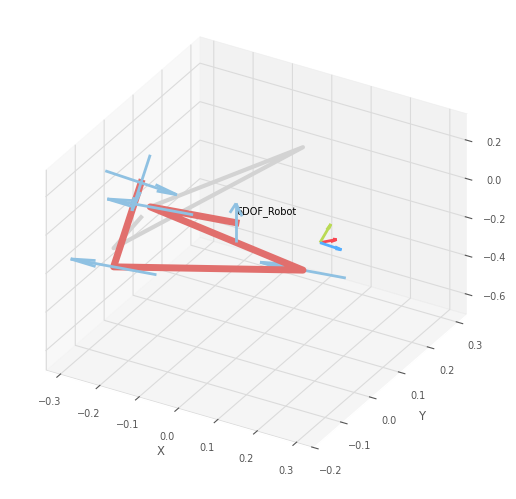

<Figure size 640x480 with 0 Axes>

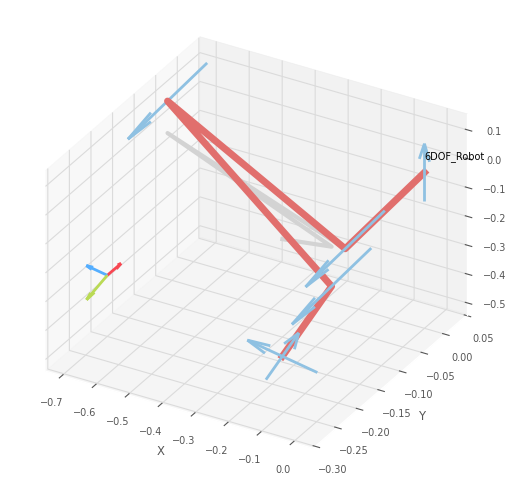

<Figure size 640x480 with 0 Axes>

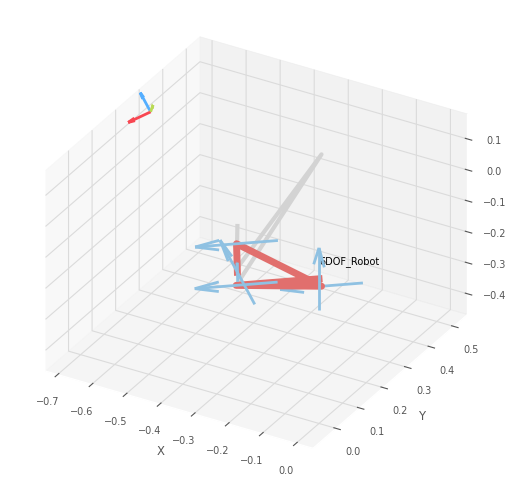

<Figure size 640x480 with 0 Axes>

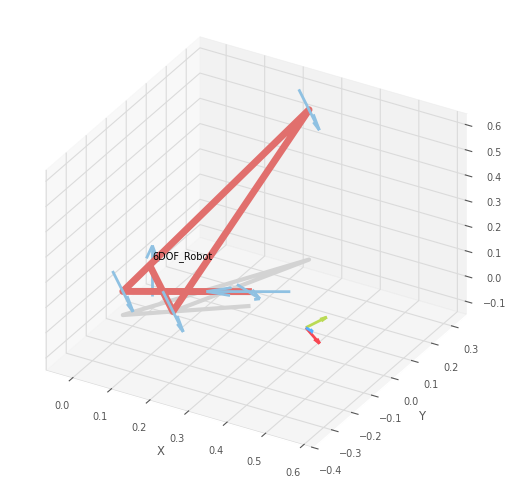

<Figure size 640x480 with 0 Axes>

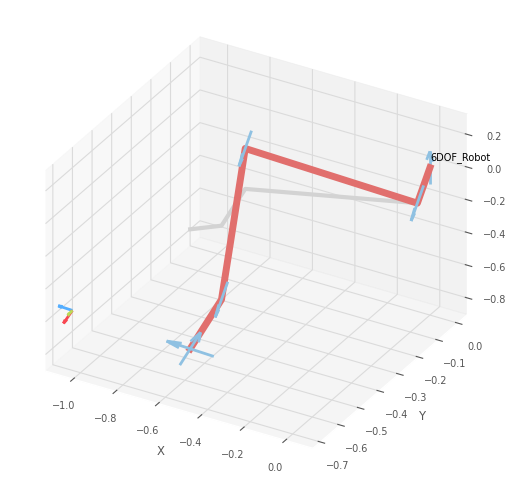

<Figure size 640x480 with 0 Axes>

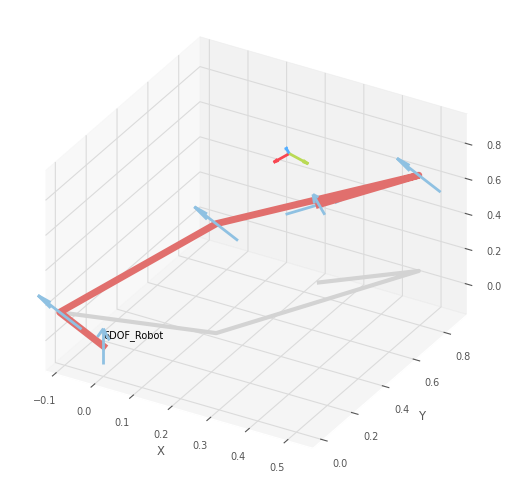

<Figure size 640x480 with 0 Axes>

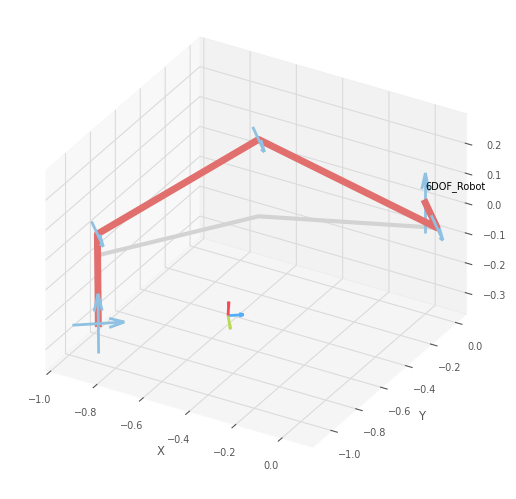

<Figure size 640x480 with 0 Axes>

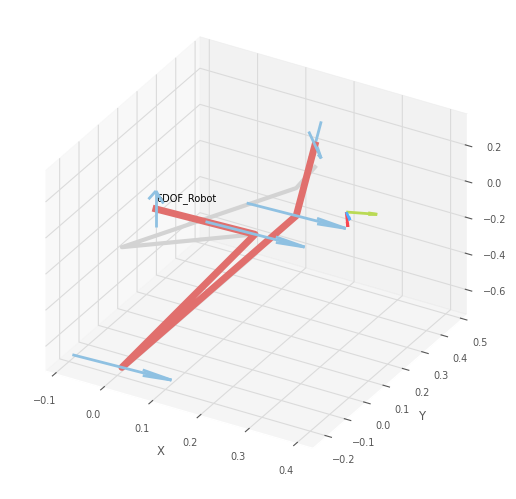

<Figure size 640x480 with 0 Axes>

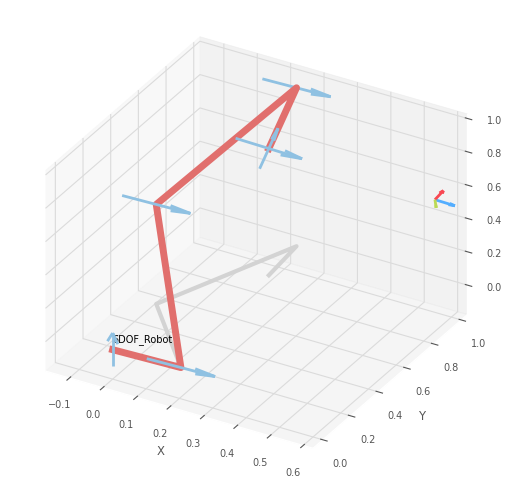

<Figure size 640x480 with 0 Axes>

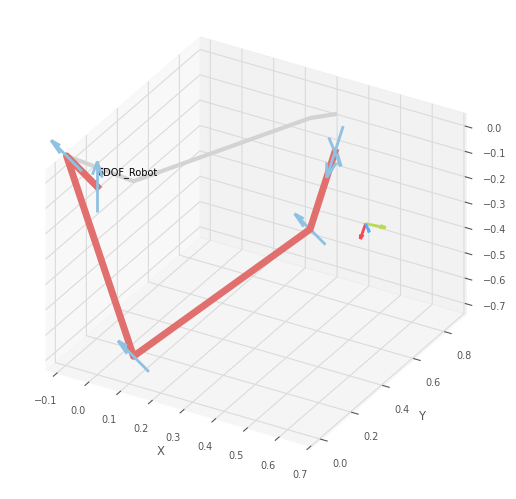

<Figure size 640x480 with 0 Axes>

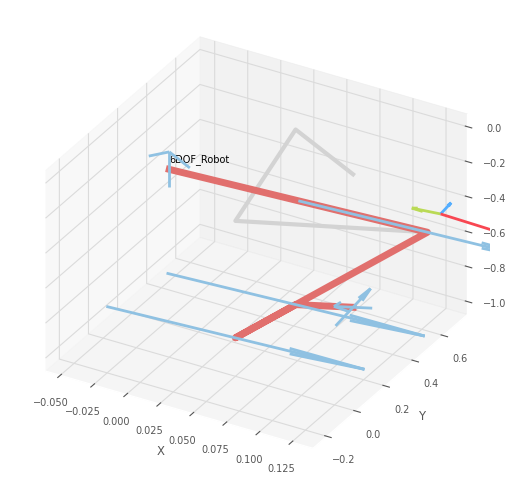

<Figure size 640x480 with 0 Axes>

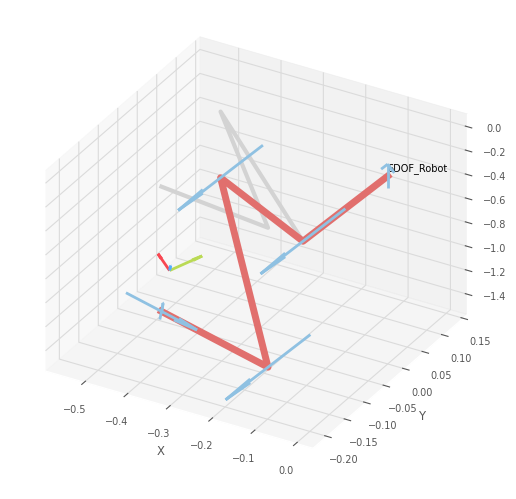

<Figure size 640x480 with 0 Axes>

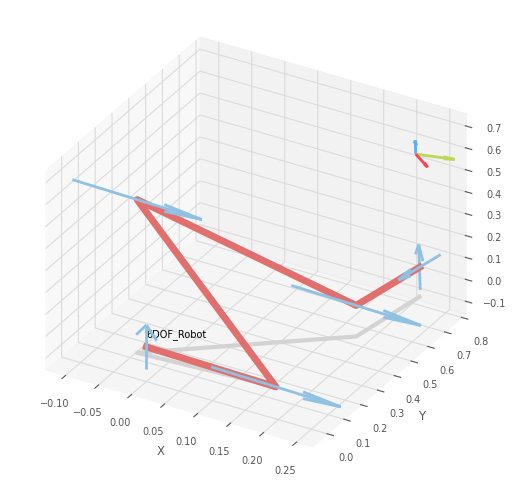

<Figure size 640x480 with 0 Axes>

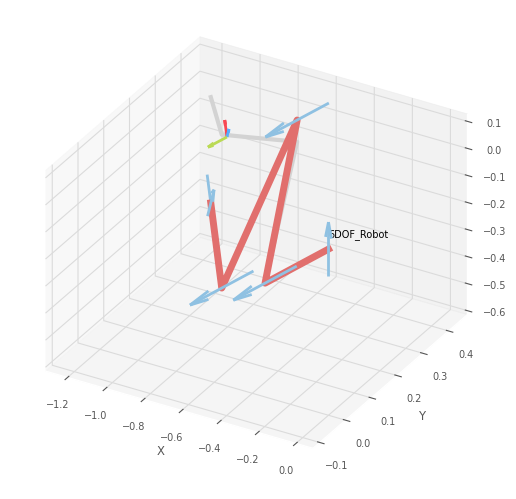

<Figure size 640x480 with 0 Axes>

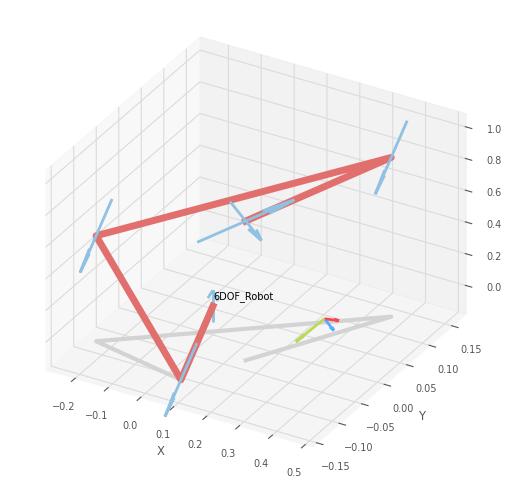

<Figure size 640x480 with 0 Axes>

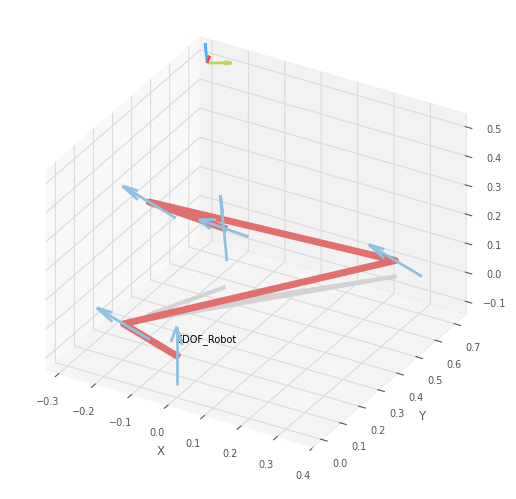

<Figure size 640x480 with 0 Axes>

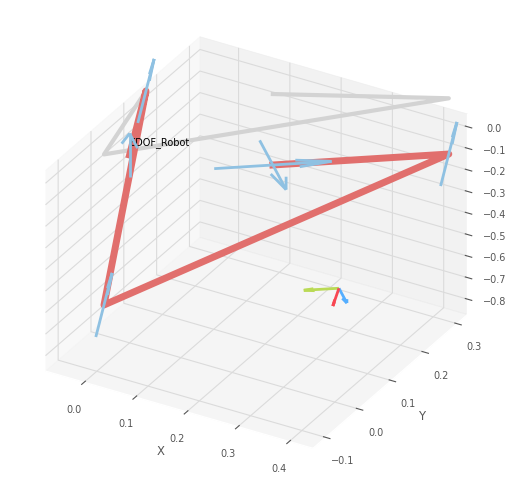

<Figure size 640x480 with 0 Axes>

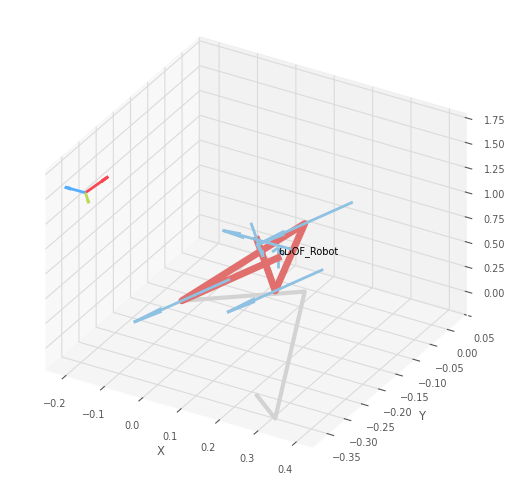

<Figure size 640x480 with 0 Axes>

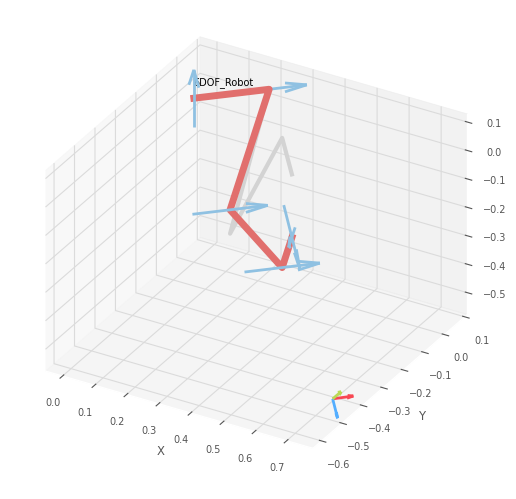

<Figure size 640x480 with 0 Axes>

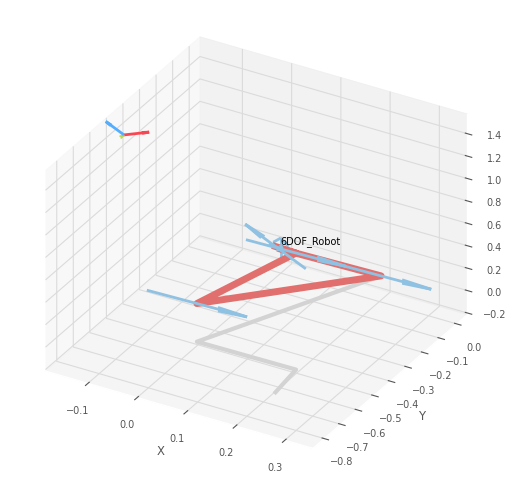

<Figure size 640x480 with 0 Axes>

In [297]:
# กำหนดขอบเขตการเคลื่อนไหวของข้อต่อแต่ละตัว
q_limits = np.array([[-np.pi, np.pi]] * 6)

# ฟังก์ชันแสดง workspace ของหุ่นยนต์และการเคลื่อนไหว
def simulate_robot_motion(robot, num_steps=50):
    # เริ่มต้นการสร้างภาพ
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([0, 1.5])
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title("Robot Workspace Simulation")

    # สุ่มข้อต่อเริ่มต้น
    q_start = np.random.uniform(q_limits[:, 0], q_limits[:, 1])

    for _ in range(num_steps):
        # สุ่มมุมข้อต่อใหม่ในแต่ละขั้นตอน แต่ไม่เคลื่อนที่ฐาน
        q_next = np.random.uniform(q_limits[:, 0], q_limits[:, 1])

        # คำนวณตำแหน่งปลายแขนหุ่นยนต์ (forward kinematics)
        T = robot.fkine(q_next)

        # เคลียร์จุดเก่า
        ax.cla()
        ax.set_xlim([-1.5, 1.5])
        ax.set_ylim([-1.5, 1.5])
        ax.set_zlim([0, 1.5])

        # แสดงปลายแขนของหุ่นยนต์ใน workspace
        ax.scatter(T.t[0], T.t[1], T.t[2], c='r', marker='o', label="End-effector")
        ax.legend()

        # ใช้ฟังก์ชัน plot เพื่อแสดงการเคลื่อนไหวของหุ่นยนต์ โดยไม่เคลื่อนที่ฐาน
        robot.plot(q_next, block=False)

        plt.draw()
        plt.pause(0.1)  # ตั้งค่าความเร็วในการเคลื่อนไหว
        sleep(0.1)

    plt.show()

# เริ่มการจำลอง
simulate_robot_motion(robot)